In [1]:
import sys
import time
import json
import random
import numpy as np
# import matplotlib.pyplot as plt

sys.path.append('../core/python')

from commons import full_inference_e2e,inc_inference, show_heatmap
from imagenet_classes import class_names
from vgg16 import VGG16
from resnet18 import ResNet18
from inception3 import Inception3

In [2]:
image_file_path = "../images/input/imagenet/camel.jpg"

In [3]:
'''
    In this auto-configuration, we're targeting on find the intercept & slope for each model based on current GPU
    in order to repeat the real scene of the entire time from setting up a model from scratch 
    parameters affecting the running time are: stride, patch, model, x_size , y_size
    However, in one GPU, number of calcualation for a batch size is certain, therefore, we can estimate time to compute 
    depends on the these input, basically number of computations is on proportional to 
    number of computations = (x_size - patch) * (y_size - patch) / stride / stride
'''

def calculateX(xsize, ysize, patch, stride):
    return (xsize - patch) * (ysize - patch) * 1.0 / stride / stride


In [3]:

'''
    choose a list of different sizes, using linear regression to make the approach
    in terms of the patch_size as well as stride_size, we choose use random choice
'''

xsize_list = [224, 112, 112, 168]
ysize_list = [168, 224, 112, 112]

# xsize_list = [224]
# ysize_list = [168]

patch_size = [16, 8, 4, 2]
stride_size = [16, 8, 4, 2]

len_list = len(xsize_list)

# vgg_exact_gpu_paralist = []
# vgg_exact_gpu_timelist = []
# vgg_approx_gpu_paralist = []
# vgg_approx_gpu_timelist = []

# vgg_exact_cpu_paralist = []
# vgg_exact_cpu_timelist = []
# vgg_approx_cpu_paralist = []
# vgg_approx_cpu_timelist = []

# resnet_exact_gpu_paralist = []
# resnet_exact_gpu_timelist = []
# resnet_approx_gpu_paralist = []
# resnet_approx_gpu_timelist = []

# resnet_exact_cpu_paralist = []
# resnet_exact_cpu_timelist = []
# resnet_approx_cpu_paralist = []
# resnet_approx_cpu_timelist = []

inception_exact_gpu_paralist = []
inception_exact_gpu_timelist = []
inception_approx_gpu_paralist = []
inception_approx_gpu_timelist = []

# inception_exact_cpu_paralist = []
# inception_exact_cpu_timelist = []
# inception_approx_cpu_paralist = []
# inception_approx_cpu_timelist = []

'''
    there will be illegal memory 
    in this case select use batch size 64 for Inception3
    and 128 for VGG16 & ResNet18
'''

for i in range(len_list):
    print('i ' + str(i))
    for j in patch_size:
        print('j ' + str(j))
        for k in stride_size:
            print('k ' + str(k))
            x = calculateX(xsize_list[i], ysize_list[i], j, k)
            '''
            krypton exact version gpu
            '''
#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',VGG16, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], gpu=True)            
#             end_time = time.time()
            
#             vgg_exact_gpu_paralist.append(x)
#             vgg_exact_gpu_timelist.append(end_time - start_time)

#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',ResNet18, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], gpu=True)
#             end_time = time.time()
            
#             resnet_exact_gpu_paralist.append(x)
#             resnet_exact_gpu_timelist.append(end_time - start_time)

            start_time = time.time()
            _,_,_ = inc_inference('imagenet', Inception3, image_file_path, batch_size=64, patch_size=j, stride=k, image_size=299, x_size=299, y_size=299, gpu=True)
            end_time = time.time()
            
            inception_exact_gpu_paralist.append(x)
            inception_exact_gpu_timelist.append(end_time - start_time)
            
            '''
            krypton exact version cpu version
            '''
            
#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',VGG16, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], gpu=False)            
#             end_time = time.time()
            
#             vgg_exact_cpu_paralist.append(x)
#             vgg_exact_cpu_timelist.append(end_time - start_time)

#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet', ResNet18, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], gpu=False)
#             end_time = time.time()
            
#             resnet_exact_cpu_paralist.append(x)
#             resnet_exact_cpu_timelist.append(end_time - start_time)

#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',Inception3, image_file_path, batch_size=64, patch_size=j, stride=k, image_size=299, x_size=299, y_size=299, gpu=False)
#             end_time = time.time()
            
#             inception_exact_cpu_paralist.append(x)
#             inception_exact_cpu_timelist.append(end_time - start_time)
            
            '''
            krypton approx version with projective field parameter = 0.5, gpu version
            '''
#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',VGG16, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], beta=0.5, gpu=True)            
#             end_time = time.time()
            
#             vgg_approx_gpu_paralist.append(x)
#             vgg_approx_gpu_timelist.append(end_time - start_time)

#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',ResNet18, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], beta=0.5, gpu=True)
#             end_time = time.time()
            
#             resnet_approx_gpu_paralist.append(x)
#             resnet_approx_gpu_timelist.append(end_time - start_time)

            start_time = time.time()
            _,_,_ = inc_inference('imagenet',Inception3, image_file_path, batch_size=64, patch_size=j, stride=k, image_size=299, x_size=299, y_size=299, beta=0.5, gpu=True)
            end_time = time.time()
            
            inception_approx_gpu_paralist.append(x)
            inception_approx_gpu_timelist.append(end_time - start_time)
            
            '''
            krypton approx version with projective field parameter = 0.5, cpu version
            '''
#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',VGG16, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], beta=0.5, gpu=False)            
#             end_time = time.time()
            
#             vgg_approx_cpu_paralist.append(x)
#             vgg_approx_cpu_timelist.append(end_time - start_time)

#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',ResNet18, image_file_path, patch_size=j, stride=k, x_size=xsize_list[i], y_size=ysize_list[i], beta=0.5, gpu=False)
#             end_time = time.time()
            
#             resnet_approx_cpu_paralist.append(x)
#             resnet_approx_cpu_timelist.append(end_time - start_time)

#             start_time = time.time()
#             _,_,_ = inc_inference('imagenet',Inception3, image_file_path, batch_size=64, patch_size=j, stride=k, image_size=299, x_size=299, y_size=299, beta=0.5, gpu=False)
#             end_time = time.time()
            
#             inception_approx_cpu_paralist.append(x)
#             inception_approx_cpu_timelist.append(end_time - start_time)


i 0
j 16
k 16


/usr/local/lib/python2.7/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


k 8
k 4
k 2
j 8
k 16
k 8
k 4
k 2
j 4
k 16
k 8
k 4
k 2
j 2
k 16
k 8
k 4
k 2
i 1
j 16
k 16
k 8
k 4
k 2
j 8
k 16
k 8
k 4
k 2
j 4
k 16
k 8
k 4
k 2
j 2
k 16
k 8
k 4
k 2
i 2
j 16
k 16
k 8
k 4
k 2
j 8
k 16
k 8
k 4
k 2
j 4
k 16
k 8
k 4
k 2
j 2
k 16
k 8
k 4
k 2
i 3
j 16
k 16
k 8
k 4
k 2
j 8
k 16
k 8
k 4
k 2
j 4
k 16
k 8
k 4
k 2
j 2
k 16
k 8
k 4
k 2


In [4]:
'''
    This part do naive inference on the entire image
'''
patch_size = [16, 8, 4, 2]
stride_size = [16, 8, 4, 2]

# vgg_naive_gpu_paralist = []
# vgg_naive_gpu_timelist = []
# resnet_naive_gpu_paralist = []
# resnet_naive_gpu_timelist = []
inception_naive_gpu_paralist = []
inception_naive_gpu_timelist = []

# vgg_naive_cpu_paralist = []
# vgg_naive_cpu_timelist = []
# resnet_naive_cpu_paralist = []
# resnet_naive_cpu_timelist = []
# inception_naive_cpu_paralist = []
# inception_naive_cpu_timelist = []

for i in patch_size:
    print('i ' + str(i))
    for j in stride_size:
                print('j ' + str(j))
#         for k in range(3):
            #vgg16
#             if k == 0:
#                 x = calculateX(224, 224, i, j)
#                 start_time = time.time()
#                 _,_,_ = full_inference_e2e('imagenet',VGG16, image_file_path, batch_size=64, patch_size=i, stride=j, x_size=224, y_size=224, gpu=True)            
#                 end_time = time.time()
#                 vgg_naive_gpu_paralist.append(x)
#                 vgg_naive_gpu_timelist.append(end_time - start_time)
                
#                 start_time = time.time()
#                 _,_,_ = full_inference_e2e('imagenet',VGG16, image_file_path, patch_size=i, stride=j, x_size=224, y_size=224, gpu=False)            
#                 end_time = time.time()
#                 vgg_naive_cpu_paralist.append(x)
#                 vgg_naive_cpu_timelist.append(end_time - start_time)
            
            #resnet18
#             elif k == 1:
#                 x = calculateX(224, 224, i, j)
#                 start_time = time.time()
#                 _,_,_ = full_inference_e2e('imagenet',ResNet18, image_file_path, patch_size=i, stride=j, x_size=224, y_size=224, gpu=True)            
#                 end_time = time.time()
#                 resnet_naive_gpu_paralist.append(x)
#                 resnet_naive_gpu_timelist.append(end_time - start_time)

#                 start_time = time.time()
#                 _,_,_ = full_inference_e2e('imagenet',ResNet18, image_file_path, patch_size=i, stride=j, x_size=224, y_size=224, gpu=False)            
#                 end_time = time.time()
#                 resnet_naive_cpu_paralist.append(x)
#                 resnet_naive_cpu_timelist.append(end_time - start_time)
                
            #inceptionv3
#             else:
                x = calculateX(299, 299, i, j)
                start_time = time.time()
                _,_,_ = full_inference_e2e('imagenet',Inception3, image_file_path, batch_size=64, patch_size=i, stride=j, image_size=299, x_size=299, y_size=299, gpu=True)            
                end_time = time.time()
                inception_naive_gpu_paralist.append(x)
                inception_naive_gpu_timelist.append(end_time - start_time)
                
#                 start_time = time.time()
#                 _,_,_ = full_inference_e2e('imagenet',Inception3, image_file_path, batch_size=64, patch_size=i, stride=j, image_size=299, x_size=299, y_size=299, gpu=False)            
#                 end_time = time.time()
#                 inception_naive_cpu_paralist.append(x)
#                 inception_naive_cpu_timelist.append(end_time - start_time)
                

i 16
j 16


/usr/local/lib/python2.7/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


j 8
j 4
j 2
i 8
j 16
j 8
j 4
j 2
i 4
j 16
j 8
j 4
j 2
i 2
j 16
j 8
j 4
j 2


0

In [6]:
'''
    we have to minimize the ||Ax - b|| --> need to find the optimal approach 
    Calculate the slope and intercept for a given list for parameters
    on the time as well as constant, we'll use closed-form linear regression to derive the slope,
    intercept for vgg, resnet, inception. 
    
    vgg_paralist 1 * n appends all ones --> to make it A 2 * n
    vgg_timelist 1 * n
'''
# len1 = len(inception_exact_gpu_paralist)
len2 = len(resnet_naive_gpu_paralist)

# vgg_exact_gpu_para = np.asarray(vgg_exact_gpu_paralist).reshape((len1,1))
# vgg_exact_gpu_time = np.asarray(vgg_exact_gpu_timelist).reshape((len1,1))
# vgg_approx_gpu_para = np.asarray(vgg_approx_gpu_paralist).reshape((len1,1))
# vgg_approx_gpu_time = np.asarray(vgg_approx_gpu_timelist).reshape((len1,1))
# vgg_naive_gpu_para = np.asarray(vgg_naive_gpu_paralist).reshape((len2,1))
# vgg_naive_gpu_time = np.asarray(vgg_naive_gpu_timelist).reshape((len2,1))

# vgg_exact_cpu_para = np.asarray(vgg_exact_cpu_paralist).reshape((len1,1))
# vgg_exact_cpu_time = np.asarray(vgg_exact_cpu_timelist).reshape((len1,1))
# vgg_approx_cpu_para = np.asarray(vgg_approx_cpu_paralist).reshape((len1,1))
# vgg_approx_cpu_time = np.asarray(vgg_approx_cpu_timelist).reshape((len1,1))
# vgg_naive_cpu_para = np.asarray(vgg_naive_cpu_paralist).reshape((len2,1))
# vgg_naive_cpu_time = np.asarray(vgg_naive_cpu_timelist).reshape((len2,1))

# resnet_exact_gpu_para = np.asarray(resnet_exact_gpu_paralist).reshape((len1,1))
# resnet_exact_gpu_time = np.asarray(resnet_exact_gpu_timelist).reshape((len1,1))
# resnet_approx_gpu_para = np.asarray(resnet_approx_gpu_paralist).reshape((len1,1))
# resnet_approx_gpu_time = np.asarray(resnet_approx_gpu_timelist).reshape((len1,1))
# resnet_naive_gpu_para = np.asarray(resnet_naive_gpu_paralist).reshape((len2,1))
# resnet_naive_gpu_time = np.asarray(resnet_naive_gpu_timelist).reshape((len2,1))

# resnet_exact_cpu_para = np.asarray(resnet_exact_cpu_paralist).reshape((len1,1))
# resnet_exact_cpu_time = np.asarray(resnet_exact_cpu_timelist).reshape((len1,1))
# resnet_approx_cpu_para = np.asarray(resnet_approx_cpu_paralist).reshape((len1,1))
# resnet_approx_cpu_time = np.asarray(resnet_approx_cpu_timelist).reshape((len1,1))
# resnet_naive_cpu_para = np.asarray(resnet_naive_cpu_paralist).reshape((len2,1))
# resnet_naive_cpu_time = np.asarray(resnet_naive_cpu_timelist).reshape((len2,1))

# inception_exact_gpu_para = np.asarray(inception_exact_gpu_paralist).reshape((len1,1))
# inception_exact_gpu_time = np.asarray(inception_exact_gpu_timelist).reshape((len1,1))
# inception_approx_gpu_para = np.asarray(inception_approx_gpu_paralist).reshape((len1,1))
# inception_approx_gpu_time = np.asarray(inception_approx_gpu_timelist).reshape((len1,1))
inception_naive_gpu_para = np.asarray(inception_naive_gpu_paralist).reshape((len2,1))
inception_naive_gpu_time = np.asarray(inception_naive_gpu_timelist).reshape((len2,1))

# inception_exact_cpu_para = np.asarray(inception_exact_cpu_paralist).reshape((len1,1))
# inception_exact_cpu_time = np.asarray(inception_exact_cpu_timelist).reshape((len1,1))
# inception_approx_cpu_para = np.asarray(inception_approx_cpu_paralist).reshape((len1,1))
# inception_approx_cpu_time = np.asarray(inception_approx_cpu_timelist).reshape((len1,1))
# inception_naive_cpu_para = np.asarray(inception_naive_cpu_paralist).reshape((len2,1))
# inception_naive_cpu_time = np.asarray(inception_naive_cpu_timelist).reshape((len2,1))

# ones1 = np.ones((len1,1))
ones2 = np.ones((len2,1))


In [7]:
# A_exact_gpu_vgg = np.hstack((vgg_exact_gpu_para, ones1))
# A_approx_gpu_vgg = np.hstack((vgg_approx_gpu_para, ones1))
# A_naive_gpu_vgg = np.hstack((vgg_naive_gpu_para, ones2))
# A_exact_cpu_vgg = np.hstack((vgg_exact_cpu_para, ones1))
# A_approx_cpu_vgg = np.hstack((vgg_approx_cpu_para, ones1))
# A_naive_cpu_vgg = np.hstack((vgg_naive_cpu_para, ones2))


# A_exact_gpu_resnet = np.hstack((resnet_exact_gpu_para, ones1))
# A_approx_gpu_resnet = np.hstack((resnet_approx_gpu_para, ones1))
# A_naive_gpu_resnet = np.hstack((resnet_naive_gpu_para, ones2))
# A_exact_cpu_resnet = np.hstack((resnet_exact_cpu_para, ones1))
# A_approx_cpu_resnet = np.hstack((resnet_approx_cpu_para, ones1))
# A_naive_cpu_resnet = np.hstack((resnet_naive_cpu_para, ones2))


# A_exact_gpu_inception = np.hstack((inception_exact_gpu_para, ones1))
# A_approx_gpu_inception = np.hstack((inception_approx_gpu_para, ones1))
A_naive_gpu_inception = np.hstack((inception_naive_gpu_para, ones2))
# A_exact_cpu_inception = np.hstack((inception_exact_cpu_para, ones1))
# A_approx_cpu_inception = np.hstack((inception_approx_cpu_para, ones1))
# A_naive_cpu_inception = np.hstack((inception_naive_cpu_para, ones2))



In [8]:
# X_exact_gpu_vgg = np.dot(np.dot(np.linalg.inv(np.dot(A_exact_gpu_vgg.T, A_exact_gpu_vgg)),A_exact_gpu_vgg.T), vgg_exact_gpu_time)
# X_approx_gpu_vgg = np.dot(np.dot(np.linalg.inv(np.dot(A_approx_gpu_vgg.T, A_approx_gpu_vgg)),A_approx_gpu_vgg.T), vgg_approx_gpu_time)
# X_naive_gpu_vgg = np.dot(np.dot(np.linalg.inv(np.dot(A_naive_gpu_vgg.T, A_naive_gpu_vgg)),A_naive_gpu_vgg.T), vgg_naive_gpu_time)
# X_exact_cpu_vgg = np.dot(np.dot(np.linalg.inv(np.dot(A_exact_cpu_vgg.T, A_exact_cpu_vgg)),A_exact_cpu_vgg.T), vgg_exact_cpu_time)
# X_approx_cpu_vgg = np.dot(np.dot(np.linalg.inv(np.dot(A_approx_cpu_vgg.T, A_approx_cpu_vgg)),A_approx_cpu_vgg.T), vgg_approx_cpu_time)
# X_naive_cpu_vgg = np.dot(np.dot(np.linalg.inv(np.dot(A_naive_cpu_vgg.T, A_naive_cpu_vgg)),A_naive_cpu_vgg.T), vgg_naive_cpu_time)


# X_exact_gpu_resnet = np.dot(np.dot(np.linalg.inv(np.dot(A_exact_gpu_resnet.T, A_exact_gpu_resnet)),A_exact_gpu_resnet.T), resnet_exact_gpu_time)
# X_approx_gpu_resnet = np.dot(np.dot(np.linalg.inv(np.dot(A_approx_gpu_resnet.T, A_approx_gpu_resnet)),A_approx_gpu_resnet.T), resnet_approx_gpu_time)
# X_naive_gpu_resnet = np.dot(np.dot(np.linalg.inv(np.dot(A_naive_gpu_resnet.T, A_naive_gpu_resnet)),A_naive_gpu_resnet.T), resnet_naive_gpu_time)
# X_exact_cpu_resnet = np.dot(np.dot(np.linalg.inv(np.dot(A_exact_cpu_resnet.T, A_exact_cpu_resnet)),A_exact_cpu_resnet.T), resnet_exact_cpu_time)
# X_approx_cpu_resnet = np.dot(np.dot(np.linalg.inv(np.dot(A_approx_cpu_resnet.T, A_approx_cpu_resnet)),A_approx_cpu_resnet.T), resnet_approx_cpu_time)
# X_naive_cpu_resnet = np.dot(np.dot(np.linalg.inv(np.dot(A_naive_cpu_resnet.T, A_naive_cpu_resnet)),A_naive_cpu_resnet.T), resnet_naive_cpu_time)


# X_exact_gpu_inception = np.dot(np.dot(np.linalg.inv(np.dot(A_exact_gpu_inception.T, A_exact_gpu_inception)),A_exact_gpu_inception.T), inception_exact_gpu_time)
# X_approx_gpu_inception = np.dot(np.dot(np.linalg.inv(np.dot(A_approx_gpu_inception.T, A_approx_gpu_inception)),A_approx_gpu_inception.T), inception_approx_gpu_time)
X_naive_gpu_inception = np.dot(np.dot(np.linalg.inv(np.dot(A_naive_gpu_inception.T, A_naive_gpu_inception)),A_naive_gpu_inception.T), inception_naive_gpu_time)
# X_exact_cpu_inception = np.dot(np.dot(np.linalg.inv(np.dot(A_exact_cpu_inception.T, A_exact_cpu_inception)),A_exact_cpu_inception.T), inception_exact_cpu_time)
# X_approx_cpu_inception = np.dot(np.dot(np.linalg.inv(np.dot(A_approx_cpu_inception.T, A_approx_cpu_inception)),A_approx_cpu_inception.T), inception_approx_cpu_time)
# X_naive_cpu_inception = np.dot(np.dot(np.linalg.inv(np.dot(A_naive_cpu_inception.T, A_naive_cpu_inception)),A_naive_cpu_inception.T), inception_naive_cpu_time)

In [ ]:
def abline(slope, intercept, para, time):
    #plot a line
    fig = plt.figure()
    axes = plt.gca()
    x_vals = np.arange(1,50000,1)
    y_vals = intercept + slope * x_vals
    ax = fig.add_axes(axes)
    ax.plot(x_vals, y_vals, '--')
    ax.plot(para, time, 'ro')
    ax.set_title('time approximation')
    ax.set_xlabel('number of computations')
    ax.set_ylabel('estimated time(s)')
    return fig

In [ ]:
# vgg_fig = abline(X_vgg[0][0], X_vgg[1][0], vgg_paralist, vgg_timelist)
# vgg_fig.savefig("vgg_time_approx.jpg")

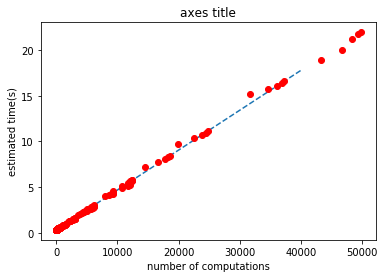

In [16]:
# resnet_fig = abline(X_resnet[0][0], X_resnet[1][0], resnet_paralist, resnet_timelist)
# resnet_fig.savefig("resnet_time_approx.jpg")

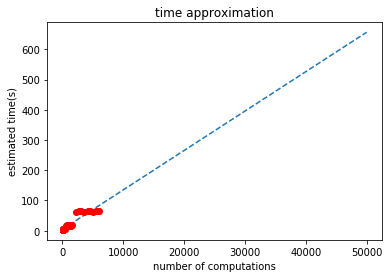

In [10]:
# inception_fig = abline(X_inception[0][0], X_inception[1][0], inception_paralist, inception_timelist)
# inception_fig.savefig("inception_time_approx.jpg")

In [11]:
# data = {}
# data['vgg16'] = {}
# data['vgg16']['exact'] = {}
# data['vgg16']['approx'] = {}
# data['vgg16']['naive'] = {}
# data['vgg16']['exact']['gpu'] = []
# data['vgg16']['approx']['gpu'] = []
# data['vgg16']['naive']['gpu'] = []

# data['vgg16']['exact']['cpu'] = []
# data['vgg16']['approx']['cpu'] = []
# data['vgg16']['naive']['cpu'] = []

# data['resnet18'] = {}
# data['resnet18']['exact'] = {}
# data['resnet18']['approx'] = {}
# data['resnet18']['naive'] = {}
# data['resnet18']['exact']['gpu'] = []
# data['resnet18']['exact']['cpu'] = []
# data['resnet18']['approx']['gpu'] = []
# data['resnet18']['approx']['cpu'] = []
# data['resnet18']['naive']['gpu'] = []
# data['resnet18']['naive']['cpu'] = []

# data['inception'] = {}
# data['inception']['exact'] = {}
# data['inception']['approx'] = {}
# data['inception']['naive'] = {}
# data['inception']['exact']['gpu'] = []
# data['inception']['exact']['cpu'] = []
# data['inception']['approx']['gpu'] = []
# data['inception']['approx']['cpu'] = []
# data['inception']['naive']['gpu'] = []
# data['inception']['naive']['cpu'] = []

# with open('PreTimeEstimation.txt', 'w') as outfile:
#     json.dump(data, outfile)

In [9]:
with open('PreTimeEstimation.txt','r') as f:
    data = json.load(f)

{u'inception': {u'approx': {u'cpu': [], u'gpu': []},
  u'exact': {u'cpu': [], u'gpu': []},
  u'naive': {u'cpu': [], u'gpu': []}},
 u'resnet18': {u'approx': {u'cpu': [], u'gpu': []},
  u'exact': {u'cpu': [], u'gpu': []},
  u'naive': {u'cpu': [], u'gpu': []}},
 u'vgg16': {u'approx': {u'cpu': [], u'gpu': []},
  u'exact': {u'cpu': [], u'gpu': []},
  u'naive': {u'cpu': [], u'gpu': []}}}

In [10]:
'''
    vgg16 data
'''

# data['vgg16']['exact']['gpu'].append({
#     'slope': X_exact_gpu_vgg[0][0],
#     'intercept': X_exact_gpu_vgg[1][0],
# })    

# data['vgg16']['approx']['gpu'].append({
#     'slope': X_approx_gpu_vgg[0][0],
#     'intercept': X_approx_gpu_vgg[1][0],
# })    

# data['vgg16']['naive']['gpu'].append({
#     'slope': X_naive_gpu_vgg[0][0],
#     'intercept': X_naive_gpu_vgg[1][0],
# })    

# data['vgg16']['exact']['cpu'].append({
#     'slope': X_exact_cpu_vgg[0][0],
#     'intercept': X_exact_cpu_vgg[1][0],
# })    

# data['vgg16']['approx']['cpu'].append({
#     'slope': X_approx_cpu_vgg[0][0],
#     'intercept': X_approx_cpu_vgg[1][0],
# })    

# data['vgg16']['naive']['cpu'].append({
#     'slope': X_naive_cpu_vgg[0][0],
#     'intercept': X_naive_cpu_vgg[1][0],
# })    

# '''
#     resnet data
# '''

# data['resnet18']['exact']['gpu'].append({
#     'slope': X_exact_gpu_resnet[0][0],
#     'intercept': X_exact_gpu_resnet[1][0],
# })    

# data['resnet18']['approx']['gpu'].append({
#     'slope': X_approx_gpu_resnet[0][0],
#     'intercept': X_approx_gpu_resnet[1][0],
# })    

# data['resnet18']['naive']['gpu'].append({
#     'slope': X_naive_gpu_resnet[0][0],
#     'intercept': X_naive_gpu_resnet[1][0],
# })    

# data['resnet18']['exact']['cpu'].append({
#     'slope': X_exact_cpu_resnet[0][0],
#     'intercept': X_exact_cpu_resnet[1][0],
# })    

# data['resnet18']['approx']['cpu'].append({
#     'slope': X_approx_cpu_resnet[0][0],
#     'intercept': X_approx_cpu_resnet[1][0],
# })    

# data['resnet18']['naive']['cpu'].append({
#     'slope': X_naive_cpu_resnet[0][0],
#     'intercept': X_naive_cpu_resnet[1][0],
# })    

# '''
#     inception data
# '''

# data['inception']['exact']['gpu'].append({
#     'slope': X_exact_gpu_inception[0][0],
#     'intercept': X_exact_gpu_inception[1][0],
# })    

# data['inception']['approx']['gpu'].append({
#     'slope': X_approx_gpu_inception[0][0],
#     'intercept': X_approx_gpu_inception[1][0],
# })    

data['inception']['naive']['gpu'].append({
    'slope': X_naive_gpu_inception[0][0],
    'intercept': X_naive_gpu_inception[1][0],
})    

# data['inception']['approx']['cpu'].append({
#     'slope': X_approx_cpu_inception[0][0],
#     'intercept': X_approx_cpu_inception[1][0],
# })    

# data['inception']['exact']['cpu'].append({
#     'slope': X_exact_cpu_inception[0][0],
#     'intercept': X_exact_cpu_inception[1][0],
# })    

# data['inception']['naive']['cpu'].append({
#     'slope': X_naive_cpu_inception[0][0],
#     'intercept': X_naive_cpu_inception[1][0],
# })    


with open('PreTimeEstimation.txt', 'w') as outfile:
    json.dump(data, outfile)


{'vgg16': {'approx': {'gpu': [{'intercept': 1.5186324444931096,
     'slope': 0.0006259685189101093}]},
  'exact': {'gpu': [{'intercept': 1.9660143642777022,
     'slope': 0.0007181932161182187}]}}}